In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocessing the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# splitting the training and test sets
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.regularizers import l2

In [48]:
# learning rates and batch size that helps achieve the best accuracy for the SGD
learning_rates = [0.01]
batch_sizes = [8]

# storing results
sgd_results = {}
other_optimizers_results = {}

In [38]:
# regularized minibatch SGD training
for lr in learning_rates:
    for batch_size in batch_sizes:

        for i in [0.01, 0.02, 1, 10, 20, 50, 100]:
          lambda_l2 = i/len(x_train)
          def regularized_model():
            model = Sequential([
                Dense(256, activation='relu', input_shape=(28*28,), kernel_regularizer=l2(lambda_l2), bias_regularizer=l2(lambda_l2)),
                Dense(128, activation='relu', kernel_regularizer=l2(lambda_l2), bias_regularizer=l2(lambda_l2)),
                Dense(64, activation='relu', kernel_regularizer=l2(lambda_l2), bias_regularizer=l2(lambda_l2)),
                Dense(10, activation='softmax', kernel_regularizer=l2(lambda_l2), bias_regularizer=l2(lambda_l2))
        ])
            return model

          model = regularized_model()
          optimizer = tf.keras.optimizers.SGD(lr)
          model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

          history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
          test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

          sgd_results[(lr, batch_size)] = {
              'history': history,
              'test_acc': test_acc
          }

          print(f'Test accuracy with Regualrized minibatch SGD, C = {i}: {test_acc}')

Test accuracy with Regualrized minibatch SGD, C = 0.01: 0.9754999876022339
Test accuracy with Regualrized minibatch SGD, C = 0.02: 0.9787999987602234
Test accuracy with Regualrized minibatch SGD, C = 1: 0.9760000109672546
Test accuracy with Regualrized minibatch SGD, C = 10: 0.979200005531311
Test accuracy with Regualrized minibatch SGD, C = 20: 0.9761999845504761
Test accuracy with Regualrized minibatch SGD, C = 50: 0.9764999747276306
Test accuracy with Regualrized minibatch SGD, C = 100: 0.9710000157356262


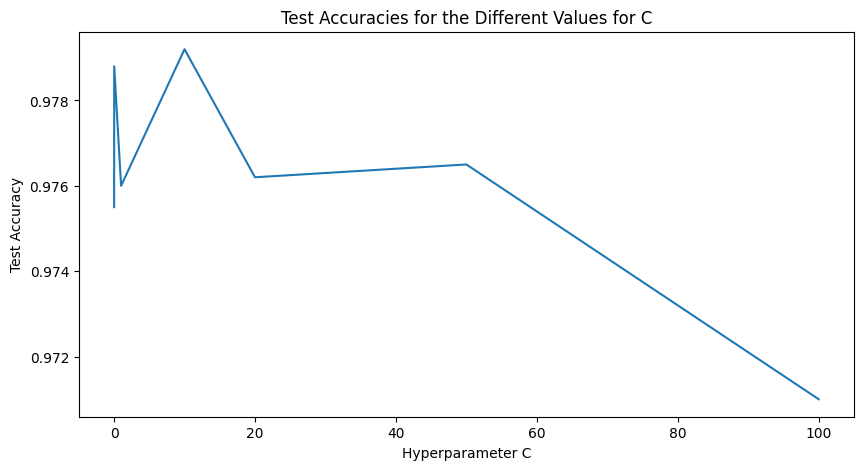

In [47]:
import numpy as np
import matplotlib.pyplot as plt

test_accuracy = [0.9754999876022339,0.9787999987602234, 0.9760000109672546, 0.979200005531311, 0.9761999845504761, 0.9764999747276306, 0.9710000157356262]
C = [0.01, 0.02, 1, 10, 20, 50, 100]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.plot(C, test_accuracy)

plt.xlabel("Hyperparameter C")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracies for the Different Values for C")
plt.show()